In [1]:
import pyodbc
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [2]:
def convert(data):
    number = preprocessing.LabelEncoder()
    data['company'] = number.fit_transform(data['company'])
    data['location'] = number.fit_transform(data['location'])
    data['industry'] = number.fit_transform(data['industry'])
    data['date'] = number.fit_transform(data['date'])
    data['stage'] = number.fit_transform(data['stage'])
    data['country'] = number.fit_transform(data['country'])
    data=data.fillna(0)
    return data

In [3]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=;'
                      'Database=comp8047;'
                      'Trusted_Connection=yes;')


In [ ]:
layoff_predict_month = ['202402']
job_post_predict_dates = [20240223, 20240224, 20240225]

In [4]:
'''
layoff data selection
'''
layoff_raw_df = pd.read_sql("select * from layoff_data where not(total_laid_off = 0 and percentage_laid_off = 0)", conn)
print('The shape of the dataset : ', layoff_raw_df.shape)
layoff_raw_df.head()

The shape of the dataset :  (2775, 9)


d:\python3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Akulaku,Jakarta,Finance,100,0.00,2020-04-15,Series D,Indonesia,160.0
1,AlayaCare,Montreal,Healthcare,80,0.14,2022-08-16,Series D,Canada,293.0
2,Albert,Los Angeles,Finance,20,0.08,2022-06-10,Series C,United States,175.0
3,Alerzo,Ibadan,Retail,100,0.00,2023-11-21,Series B,Nigeria,16.0
4,Alerzo,Ibadan,Retail,400,0.00,2023-03-06,Series B,Nigeria,16.0


In [5]:
layoff_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2775 non-null   object 
 1   location             2775 non-null   object 
 2   industry             2775 non-null   object 
 3   total_laid_off       2775 non-null   int64  
 4   percentage_laid_off  2775 non-null   float64
 5   date                 2775 non-null   object 
 6   stage                2775 non-null   object 
 7   country              2775 non-null   object 
 8   funds_raised         2775 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 195.2+ KB


In [6]:
layoff_feature_cols = [
    'company',
    'location',
    'industry',
    'date',
    'stage',
    'country',
    'funds_raised'
]

# predict_col = 'total_laid_off'
layoff_predict_col = 'percentage_laid_off'
# # x_train = convert(df[feature_cols])
x_layoff = layoff_raw_df[layoff_feature_cols].apply(preprocessing.LabelEncoder().fit_transform)
y_layoff = layoff_raw_df[layoff_predict_col]

x_train_layoff, x_test_layoff, y_train_layoff, y_test_layoff = train_test_split(x_layoff, y_layoff, test_size=0.1, random_state=42)

In [7]:
'''
layoff data Linear Regression plotting for layoff percentage
'''
model = LinearRegression()  # create object for the class
model.fit(x_train_layoff, y_train_layoff)  # perform linear regression
y_pred_layoff = model.predict(x_test_layoff)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test_layoff, y_pred_layoff))
print('mean_absolute_error : ', mean_absolute_error(y_test_layoff, y_pred_layoff))

mean_squared_error :  0.07737930124298499
mean_absolute_error :  0.20656430312519777


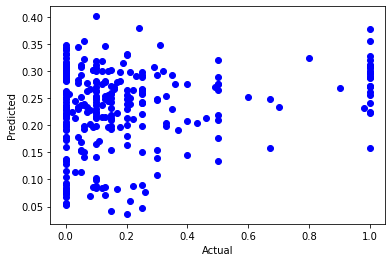

In [8]:
plt.scatter(y_test_layoff,y_pred_layoff, c='blue');
plt.xlabel('Actual');
plt.ylabel('Predicted');

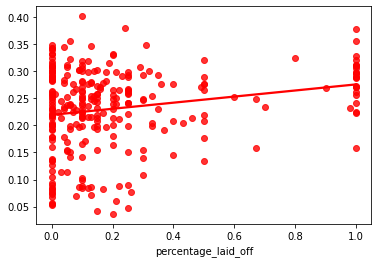

In [9]:
sns.regplot(x=y_test_layoff,y=y_pred_layoff,ci=None,color ='red');

Feature 0: company Importance: 0.18581
Feature 1: location Importance: 0.12252
Feature 2: industry Importance: 0.13725
Feature 3: date Importance: 0.22990
Feature 4: stage Importance: 0.09423
Feature 5: country Importance: 0.05474
Feature 6: funds_raised Importance: 0.17554


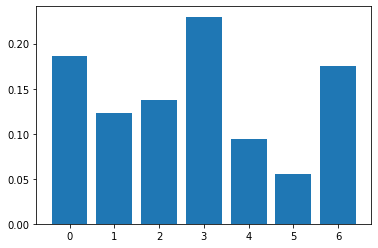

In [10]:
'''
layoff data feature importance
'''
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
# x, y = make_classification(n_samples=1000, n_features=7, n_informative=5, n_redundant=5, random_state=1)
# define the model
predict_col_layoff_num = 'total_laid_off'
# predict_col = 'percentage_laid_off'
rf_layoff_x1 = layoff_raw_df[layoff_feature_cols].apply(preprocessing.LabelEncoder().fit_transform)
rf_layoff_y1 = layoff_raw_df[predict_col_layoff_num]
clf = RandomForestClassifier()
clf = clf.fit(rf_layoff_x1,rf_layoff_y1)

rf_layoff_importance = clf.feature_importances_
for i,v in enumerate(rf_layoff_importance):
    print(f"Feature {i}: {layoff_feature_cols[i]} Importance: {v:.5f}")
pyplot.bar([x for x in range(len(rf_layoff_importance))], rf_layoff_importance)
pyplot.show()

Feature 0: company Importance: 0.19139
Feature 1: location Importance: 0.12074
Feature 2: industry Importance: 0.12859
Feature 3: date Importance: 0.23052
Feature 4: stage Importance: 0.10908
Feature 5: country Importance: 0.05049
Feature 6: funds_raised Importance: 0.16918


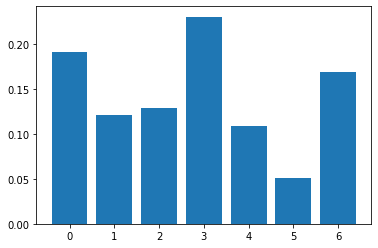

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_layoff_x1 = layoff_raw_df[layoff_feature_cols].apply(preprocessing.LabelEncoder().fit_transform)
dt_layoff_y1 = layoff_raw_df[predict_col_layoff_num]
clf = DecisionTreeClassifier()
clf = clf.fit(dt_layoff_x1,dt_layoff_y1)

dt_layoff_importance = clf.feature_importances_
for i,v in enumerate(dt_layoff_importance):
    print(f"Feature {i}: {layoff_feature_cols[i]} Importance: {v:.5f}")
pyplot.bar([x for x in range(len(dt_layoff_importance))], dt_layoff_importance)
pyplot.show()

In [12]:
'''
layoff data monthly number plotting
'''
df_monthly_layoff = pd.read_sql(
    "select FORMAT ( cast(date as date) , 'yyyyMM' ) as load_month, sum(total_laid_off) as total_layoff "\
    "from layoff_data where country in ('United States', 'Canada')"\
    "group by FORMAT ( cast(date as date) , 'yyyyMM' )", conn)
sorted_df_monthly_layoff = df_monthly_layoff.sort_values(by=['load_month'], ascending=True)
# print(sorted_df)

d:\python3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


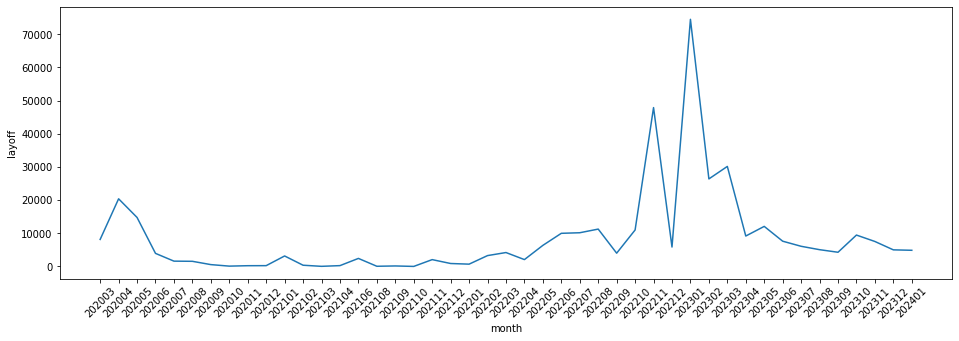

In [13]:
fig = plt.subplots(figsize=(16, 5))
plt.plot(sorted_df_monthly_layoff['load_month'],sorted_df_monthly_layoff['total_layoff']);
plt.xlabel('month');
plt.ylabel('layoff');
plt.xticks(rotation=45);
plt.show();

In [42]:
'''
layoff data monthly number model trainning: Linear Regression
'''
x_monthly_layoff = sorted_df_monthly_layoff[['load_month']]
y_monthly_layoff = sorted_df_monthly_layoff['total_layoff']
x_train_ml, x_test_ml, y_train_ml, y_test_ml = train_test_split(x_monthly_layoff, y_monthly_layoff, test_size=0.3, random_state=42,shuffle=False)
# print(x_train_ml)
model = LinearRegression()  # create object for the class
model.fit(x_train_ml, y_train_ml)  # perform linear regression
y_pred_ml = model.predict(x_test_ml)
# print(x_train.values.flatten())
print('mean_squared_error : ', mean_squared_error(y_test_ml, y_pred_ml))
print('mean_absolute_error : ', mean_absolute_error(y_test_ml, y_pred_ml))

mean_squared_error :  353322304.10645914
mean_absolute_error :  10250.396660399889


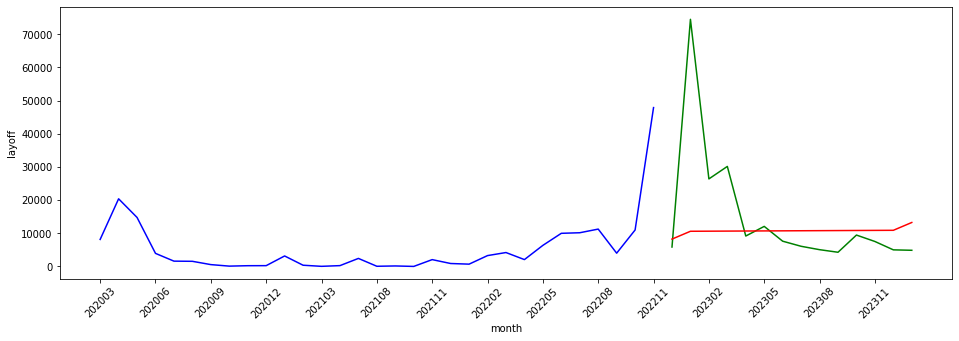

In [43]:
fig = plt.subplots(figsize=(16, 5))
xlabel_arr = np.concatenate([x_train_ml.values.flatten(), x_test_ml.values.flatten()])
plt.plot(x_train_ml.values.flatten(),y_train_ml.values, c='blue');
plt.plot(x_test_ml.values.flatten(),y_test_ml, c='green');
plt.plot(x_test_ml.values.flatten(),y_pred_ml, c='red');
plt.xlabel('month');
plt.ylabel('layoff');
plt.xticks(xlabel_arr[::3],rotation=45);
plt.show();

In [16]:
'''
layoff data monthly number prediction: Linear Regression
'''

# Calling DataFrame constructor on list
layoff_l_df = pd.DataFrame(layoff_predict_month)
print(layoff_l_df)
y_f_layoff = model.predict(layoff_l_df)
print(y_f_layoff)

        0
0  202402
[13293.93321169]


d:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
'''
layoff data monthly number model trainning: Bayesian Regression
'''
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(x_train_ml, y_train_ml)
y_pred_ml_baye = bayesian_ridge_model.predict(x_test_ml)
mse = mean_squared_error(y_test_ml, y_pred_ml_baye)
mae = mean_absolute_error(y_test_ml, y_pred_ml_baye)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
beta_0 = bayesian_ridge_model.intercept_
beta_i = bayesian_ridge_model.coef_
print(f"Intercept (beta_0): {beta_0}")
print(f"Coefficients (beta_i): {beta_i}")

Mean Squared Error: 384308000.3698176
Mean Absolute Error: 9383.503484584158
Intercept (beta_0): -2303881.538694955
Coefficients (beta_i): [11.42663034]


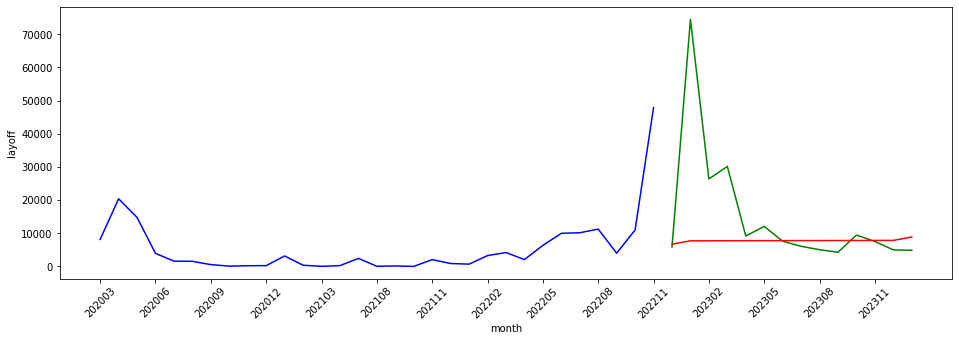

In [19]:
fig = plt.subplots(figsize=(16, 5))
xlabel_arr = np.concatenate([x_train_ml.values.flatten(), x_test_ml.values.flatten()])
plt.plot(x_train_ml.values.flatten(),y_train_ml.values, c='blue');
plt.plot(x_test_ml.values.flatten(),y_test_ml, c='green');
plt.plot(x_test_ml.values.flatten(),y_pred_ml_baye, c='red');
plt.xlabel('month');
plt.ylabel('layoff');
plt.xticks(xlabel_arr[::3],rotation=45);
plt.show();

In [20]:
'''
layoff data monthly number prediction: Bayesian Regression
'''

# Calling DataFrame constructor on list
f_df_layoff_baye = pd.DataFrame(layoff_predict_month)
print(f_df_layoff_baye)
y_f_layoff_baye = bayesian_ridge_model.predict(f_df_layoff_baye)
print(y_f_layoff_baye)

        0
0  202402
[8891.29476455]


d:\python3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


In [21]:
'''
job posting categorize number to prepare for feature selection using classification models
'''
df_job_post_cat = pd.read_sql(
      "select job_cat, loc, job_type, " \
      "case when job_count < 10 then 'low' when job_count between 10 and 100 then 'medium' else 'high' end as num_cat," \
      "prev_range, country, search_date " \
      "from job_count where country in ('us', 'ca') and job_cat not in ('development_manager', 'application_engineer')", conn)
print('The shape of the dataset : ', df_job_post_cat.shape)
df_job_post_cat.head()


d:\python3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


The shape of the dataset :  (258777, 7)


,job_cat,loc,job_type,num_cat,prev_range,country,search_date
0,cloud_architect,Alberta,all,low,1,ca,2024-01-03
1,cloud_architect,Alberta,Full-time,low,1,ca,2024-01-03
2,cloud_architect,Alberta,Permanent,low,1,ca,2024-01-03
3,cloud_architect,British_Columbia,all,low,1,ca,2024-01-03
4,cloud_architect,British_Columbia,Apprenticeship,low,1,ca,2024-01-03


In [22]:
df_job_post_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258777 entries, 0 to 258776
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   job_cat      258777 non-null  object
 1   loc          258777 non-null  object
 2   job_type     258777 non-null  object
 3   num_cat      258777 non-null  object
 4   prev_range   258777 non-null  int64 
 5   country      258777 non-null  object
 6   search_date  258777 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.8+ MB


In [23]:
feature_cols_job_post_raw = [
    'job_cat',
    'loc',
    'job_type',
    'prev_range',
    'country',
    'search_date'
]

# predict_col = 'total_laid_off'
predict_col_job_post_raw = 'num_cat'
# # x_train = convert(df[feature_cols])
x_jp_raw = df_job_post_cat[feature_cols_job_post_raw].apply(preprocessing.LabelEncoder().fit_transform)
y_jp_raw = df_job_post_cat[predict_col_job_post_raw]

# x_train_jp_raw, x_test_jp_raw, y_train_jp_raw, y_test_jp_raw = train_test_split(x_jp_raw, y_jp_raw, test_size=0.1, random_state=42)

Feature 0: job_cat Importance: 0.25669
Feature 1: loc Importance: 0.38177
Feature 2: job_type Importance: 0.12835
Feature 3: prev_range Importance: 0.00000
Feature 4: country Importance: 0.00648
Feature 5: search_date Importance: 0.22671


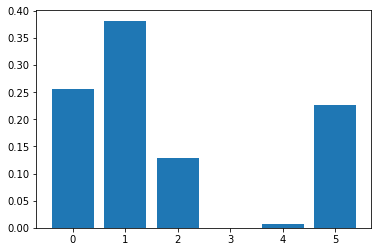

In [24]:
'''
job posting feature importance: Random Forest
'''
clf = RandomForestClassifier()
clf = clf.fit(x_jp_raw,y_jp_raw)

importance_jp_raw_rf = clf.feature_importances_
for i,v in enumerate(importance_jp_raw_rf):
    print(f"Feature {i}: {feature_cols_job_post_raw[i]} Importance: {v:.5f}")
pyplot.bar([x for x in range(len(importance_jp_raw_rf))], importance_jp_raw_rf)
pyplot.show()

Feature 0: job_cat Importance: 0.25861
Feature 1: loc Importance: 0.31355
Feature 2: job_type Importance: 0.09569
Feature 3: prev_range Importance: 0.00000
Feature 4: country Importance: 0.01227
Feature 5: search_date Importance: 0.31989


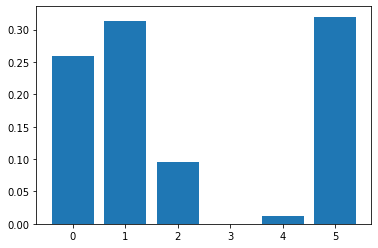

In [25]:
'''
job posting feature importance: Decision Tree
'''
clf = DecisionTreeClassifier()
clf = clf.fit(x_jp_raw,y_jp_raw)

importance_jp_raw_dt = clf.feature_importances_
for i,v in enumerate(importance_jp_raw_dt):
    print(f"Feature {i}: {feature_cols_job_post_raw[i]} Importance: {v:.5f}")
pyplot.bar([x for x in range(len(importance_jp_raw_dt))], importance_jp_raw_dt)
pyplot.show()

d:\python3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


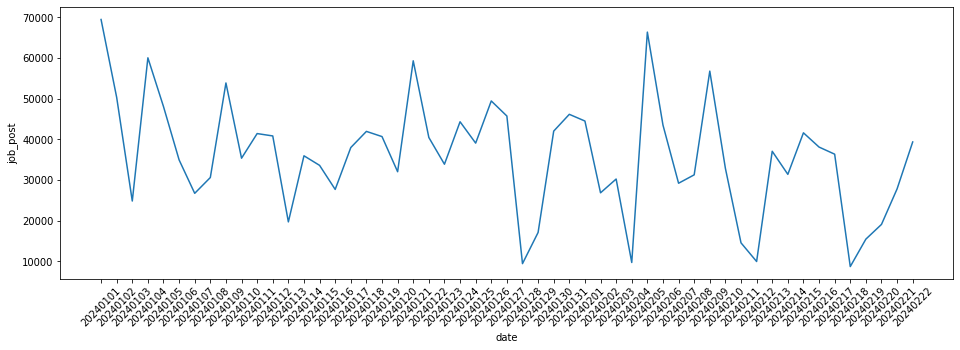

In [26]:
'''
job posting raw data plotting 
summed up by date and take data with filters base on observation
'''
df_job_count = pd.read_sql(
    "select job_cat, loc, job_count, country, FORMAT ( cast(search_date as date) , 'yyyyMMdd' ) as search_date "\
    "from job_count "\
    "where country in ('us', 'ca') and job_type = 'all' and job_cat not in ('development_manager', 'application_engineer')", conn)
sorted_df_job_count = df_job_count.sort_values(by=['search_date'], ascending=True)

total_sort_df = sorted_df_job_count.groupby('search_date', as_index = False)['job_count'].sum()
# print(total_sort_df)
fig = plt.subplots(figsize=(16, 5))
plt.plot(total_sort_df['search_date'],total_sort_df['job_count']);
plt.xlabel('date');
plt.ylabel('job_post');
plt.xticks(rotation=45);
plt.show();

In [27]:
'''
job posting map source data instead of using labeling to make prediction eaasier
'''
job_cat_dict = {
    'application_engineer': 1,
    'cloud_architect': 2,
    'cloud_engineer': 3,
    'cloud_security': 4,
    'cloud_system': 5,
    'data_analyst': 6,
    'data_architect': 7,
    'data_engineer': 8,
    'data_scientist': 9,
    'database_administrator': 10,
    'database_analyst': 11,
    'database_developer': 12,
    'development_director': 13,
    'development_manager': 14,
    'devops_engineer': 15,
    'front_end_developer': 16,
    'full_stack_developer': 17,
    'game_designer': 18,
    'game_developer': 19,
    'game_tester': 20,
    'mobile_developer': 21,
    'network_administrator': 22,
    'network_analyst': 23,
    'network_engineer': 24,
    'network_security': 25,
    'network_support': 26,
    'program_director': 27,
    'program_manager': 28,
    'quality_assurance': 29,
    'quality_engineer': 30,
    'security_analyst': 31,
    'software_engineer': 32,
    'software_tester': 33,
    'solution_architect': 34,
    'system_administrator': 35,
    'system_analyst': 36,
    'system_engineer': 37,
    'ta_architect': 38,
    'technical_analyst': 39,
    'technical_manager': 40,
    'technical_support': 41,
    'technical_writer': 42,
    'web_designer': 43,
    'web_developer': 44,
}

location_dict = {
    'Alabama': 1,
    'Alaska': 2,
    'Alberta': 3,
    'Arizona': 4,
    'Arkansas': 5,
    'British_Columbia': 6,
    'California': 7,
    'Colorado': 8,
    'Connecticut': 9,
    'Delaware': 10,
    'District_of_Columbia': 11,
    'Florida': 12,
    'Georgia': 13,
    'Hawaii': 14,
    'Idaho': 15,
    'Illinois': 16,
    'Indiana': 17,
    'Iowa': 18,
    'Kansas': 19,
    'Kentucky': 20,
    'Louisiana': 21,
    'Maine': 22,
    'Manitoba': 23,
    'Maryland': 24,
    'Massachusetts': 25,
    'Michigan': 26,
    'Minnesota': 27,
    'Mississippi': 28,
    'Missouri': 29,
    'Montana': 30,
    'Nebraska': 31,
    'Nevada': 32,
    'New_Brunswick': 33,
    'New_Hampshire': 34,
    'New_Jersey': 35,
    'New_Mexico': 36,
    'New_York': 37,
    'Newfoundland_and_Labrador': 38,
    'North_Carolina': 39,
    'North_Dakota': 40,
    'Northwest_Territories': 41,
    'Nova_Scotia': 42,
    'Nunavut': 43,
    'Ohio': 44,
    'Oklahoma': 45,
    'Ontario': 46,
    'Oregon': 47,
    'Pennsylvania': 48,
    'Prince_Edward_Island': 49,
    'Quebec': 50,
    'Rhode_Island': 51,
    'Saskatchewan': 52,
    'South_Carolina': 53,
    'South_Dakota': 54,
    'Tennessee': 55,
    'Texas': 56,
    'Utah': 57,
    'Vermont': 58,
    'Virginia': 59,
    'Washington': 60,
    'West_Virginia': 61,
    'Wisconsin': 62,
    'Wyoming': 63,
    'Yukon': 64,
}

country_dict = {
    'us': 1,
    'ca': 2
}

In [28]:
feature_cols_jc = ['job_cat', 'loc', 'country', 'search_date']
predict_col_jc = 'job_count'

sorted_df_job_count['job_cat'] = sorted_df_job_count['job_cat'].apply(lambda x: job_cat_dict.get(x))
sorted_df_job_count['loc'] =sorted_df_job_count['loc'].apply(lambda x: location_dict.get(x))
sorted_df_job_count['country'] = sorted_df_job_count['country'].apply(lambda x: country_dict.get(x))

In [29]:
'''
job posting split data base on percentage of unique search_date because default split function may sepli same date data into different bucket
'''
unique_dates = sorted_df_job_count["search_date"].unique()
train_dates, test_dates = train_test_split(unique_dates, test_size=0.1, random_state=5, shuffle=False)

training_data = sorted_df_job_count[sorted_df_job_count['search_date'].isin(train_dates)]
testing_data = sorted_df_job_count[sorted_df_job_count['search_date'].isin(test_dates)]
x_train_jc = training_data[feature_cols_jc]
x_test_jc = testing_data[feature_cols_jc]
y_train_jc = training_data[predict_col_jc]
y_test_jc = testing_data[predict_col_jc]

In [30]:
'''
job posting model train Linear Regression
'''
model = LinearRegression()  # create object for the class
model.fit(x_train_jc, y_train_jc)  # perform linear regression
y_pred_jc = model.predict(x_test_jc)
print('mean_squared_error : ', mean_squared_error(y_test_jc, y_pred_jc))
print('mean_absolute_error : ', mean_absolute_error(y_test_jc, y_pred_jc))

mean_squared_error :  761.2216744376636
mean_absolute_error :  17.315486969409974


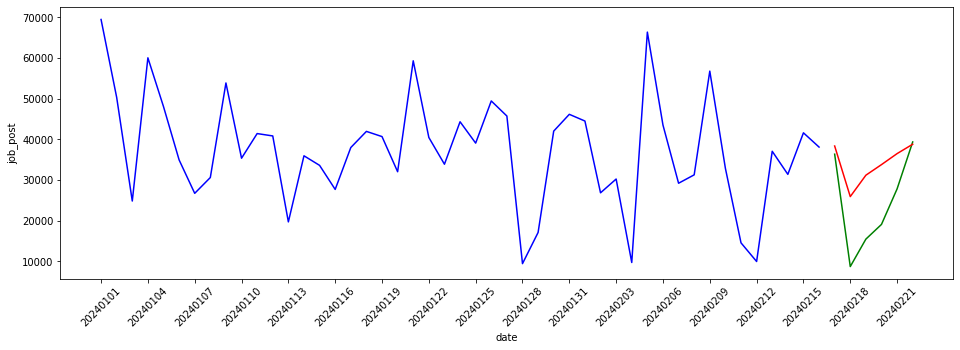

In [31]:
'''
job posting plot Linear Regression
'''
fig = plt.subplots(figsize=(16, 5))

agg_x_train_jc = x_train_jc.join(y_train_jc).groupby('search_date', as_index = False)['job_count'].sum()

agg_x_test_jc = x_test_jc.join(y_test_jc).groupby('search_date', as_index = False)['job_count'].sum()

# new dataframe holds prediction data
y_hats_df = pd.DataFrame(data = y_pred_jc, columns = ['job_count'], index = x_test_jc.index.copy())

agg_y_pred_jc = x_test_jc.join(y_hats_df).groupby('search_date', as_index = False)['job_count'].sum()
# print(agg_y_pred)
# print(x_test.join(y_pred))
xlabel_arr = np.concatenate([agg_x_train_jc['search_date'], agg_x_test_jc['search_date']])
plt.plot(agg_x_train_jc['search_date'],agg_x_train_jc['job_count'], c='blue');
plt.plot(agg_x_test_jc['search_date'],agg_x_test_jc['job_count'], c='green');
plt.plot(agg_y_pred_jc['search_date'],agg_y_pred_jc['job_count'], c='red');
plt.xlabel('date');
plt.ylabel('job_post');
plt.xticks(xlabel_arr[::3],rotation=45);
plt.show();

In [32]:
'''
job posting future prediction
create future input data with loops and dict loop ups
'''

# Analyst query product below combo has total counts over 10K which are reasonable to be predicted
# with s as (
# select job_cat, loc, country, sum(job_count) as counts
# from job_count
# where job_type = 'all'
# group by job_cat, loc, country
# )
# select * from s order by counts desc

province_country_lookup = {
    'Alabama': 1,
    'Alaska': 1,
    'Arizona': 1,
    'Arkansas': 1,
    'California': 1,
    'Colorado': 1,
    'Connecticut': 1,
    'Delaware': 1,
    'District_of_Columbia': 1,
    'Florida': 1,
    'Georgia': 1,
    'Hawaii': 1,
    'Idaho': 1,
    'Illinois': 1,
    'Indiana': 1,
    'Iowa': 1,
    'Kansas': 1,
    'Kentucky': 1,
    'Louisiana': 1,
    'Maine': 1,
    'Montana': 1,
    'Nebraska': 1,
    'Nevada': 1,
    'New_Hampshire': 1,
    'New_Jersey': 1,
    'New_Mexico': 1,
    'New_York': 1,
    'North_Carolina': 1,
    'North_Dakota': 1,
    'Ohio': 1,
    'Oklahoma': 1,
    'Oregon': 1,
    'Maryland': 1,
    'Massachusetts': 1,
    'Michigan': 1,
    'Minnesota': 1,
    'Mississippi': 1,
    'Missouri': 1,
    'Pennsylvania': 1,
    'Rhode_Island': 1,
    'South_Carolina': 1,
    'South_Dakota': 1,
    'Tennessee': 1,
    'Texas': 1,
    'Utah': 1,
    'Vermont': 1,
    'Virginia': 1,
    'Washington': 1,
    'West_Virginia': 1,
    'Wisconsin': 1,
    'Wyoming': 1,
    'Alberta': 2,
    'British_Columbia': 2,
    'Manitoba': 2,
    'New_Brunswick': 2,
    'Newfoundland_and_Labrador': 2,
    'Northwest_Territories': 2,
    'Nova_Scotia': 2,
    'Nunavut': 2,
    'Ontario': 2,
    'Prince_Edward_Island': 2,
    'Quebec': 2,
    'Saskatchewan': 2,
    'Yukon': 2,
}
pred_list = []
for d in job_post_predict_dates:
    for x in job_cat_dict.values():
        for key, value in location_dict.items():
            y = value
            z = province_country_lookup.get(key)
            pred_list.append([x,y,z,d])
                
f_df = pd.DataFrame(pred_list)
# f_df = pd.DataFrame(predict_list)
f_df.columns = feature_cols_jc
print(f_df)
# f_df['job_cat'] = f_df['job_cat'].apply(lambda x: job_cat_dict.get(x))
# f_df['loc'] = f_df['loc'].apply(lambda x: location_dict.get(x))
# f_df['country'] = f_df['country'].apply(lambda x: country_dict.get(x))
# print(f_df)

      job_cat  loc  country  search_date
0           1    1        1     20240223
1           1    2        1     20240223
2           1    3        2     20240223
3           1    4        1     20240223
4           1    5        1     20240223
...       ...  ...      ...          ...
8443       44   60        1     20240225
8444       44   61        1     20240225
8445       44   62        1     20240225
8446       44   63        1     20240225
8447       44   64        2     20240225

[8448 rows x 4 columns]


In [33]:
'''
job posting future prediction Linear Regression
sum up job_count
'''
y_f = model.predict(f_df)
int_y_f = [int(i) for i in y_f]
# print(y_f)

# new dataframe holds prediction data
y_pred_df = pd.DataFrame(data = int_y_f, columns = ['job_count'], index = f_df.index.copy())
agg_y_pred_future = f_df.join(y_pred_df).groupby('search_date', as_index = False)['job_count'].sum()
print(agg_y_pred_future)

   search_date  job_count
0     20240223      50853
1     20240224      50788
2     20240225      50715


In [34]:
'''
job posting model train Bayesian Regression
'''
bayesian_ridge_model_jc = BayesianRidge()
bayesian_ridge_model_jc.fit(x_train_jc, y_train_jc)
y_pred_ml_baye_jc = bayesian_ridge_model_jc.predict(x_test_jc)
mse = mean_squared_error(y_test_jc, y_pred_ml_baye_jc)
mae = mean_absolute_error(y_test_jc, y_pred_ml_baye_jc)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
beta_0 = bayesian_ridge_model.intercept_
beta_i = bayesian_ridge_model.coef_
print(f"Intercept (beta_0): {beta_0}")
print(f"Coefficients (beta_i): {beta_i}")

Mean Squared Error: 761.0274535007543
Mean Absolute Error: 17.30990599409189
Intercept (beta_0): -2303881.538694955
Coefficients (beta_i): [11.42663034]


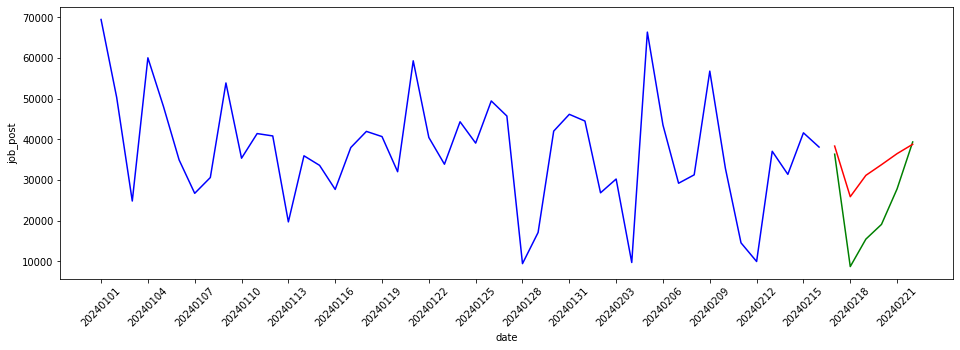

In [35]:
'''
job posting plot Bayesian Regression
'''
fig = plt.subplots(figsize=(16, 5))

agg_x_train_jc = x_train_jc.join(y_train_jc).groupby('search_date', as_index = False)['job_count'].sum()

agg_x_test_jc = x_test_jc.join(y_test_jc).groupby('search_date', as_index = False)['job_count'].sum()

# new dataframe holds prediction data
y_hats_df = pd.DataFrame(data = y_pred_ml_baye_jc, columns = ['job_count'], index = x_test_jc.index.copy())

agg_y_pred_jc = x_test_jc.join(y_hats_df).groupby('search_date', as_index = False)['job_count'].sum()
# print(agg_y_pred)
# print(x_test.join(y_pred))
xlabel_arr = np.concatenate([agg_x_train_jc['search_date'], agg_x_test_jc['search_date']])
plt.plot(agg_x_train_jc['search_date'],agg_x_train_jc['job_count'], c='blue');
plt.plot(agg_x_test_jc['search_date'],agg_x_test_jc['job_count'], c='green');
plt.plot(agg_y_pred_jc['search_date'],agg_y_pred_jc['job_count'], c='red');
plt.xlabel('date');
plt.ylabel('job_post');
plt.xticks(xlabel_arr[::3],rotation=45);
plt.show();

In [36]:
'''
job posting future prediction Bayesian
sum up job_count
'''
y_f = bayesian_ridge_model_jc.predict(f_df)
int_y_f = [int(i) for i in y_f]
# print(y_f)

# new dataframe holds prediction data
y_pred_df = pd.DataFrame(data = int_y_f, columns = ['job_count'], index = f_df.index.copy())
agg_y_pred_future = f_df.join(y_pred_df).groupby('search_date', as_index = False)['job_count'].sum()
print(agg_y_pred_future)

   search_date  job_count
0     20240223      50888
1     20240224      50836
2     20240225      50773
